In [1]:
from functions import *
import numpy as np

randomSeed = 5

/Users/zoestephens/Desktop/summer2024/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
# Loading data files

# embeddings
embeddings = pd.read_csv("csv_files/embeddings.csv")
embeddings2d = pd.read_csv("csv_files/embeddings2D.csv")

<h2>Visualizing Clusters</h2>
Below you can see a 2D visualization of the text clusters. The visualization is made by collapsing the embeddings into 2D and then graphing them based on the cluster nums chosen. The collapsing process has been explored through a variety of methods: T-SNE, PCA, and UMAP. UMAP parameters were modified to ensure the best clustering results.

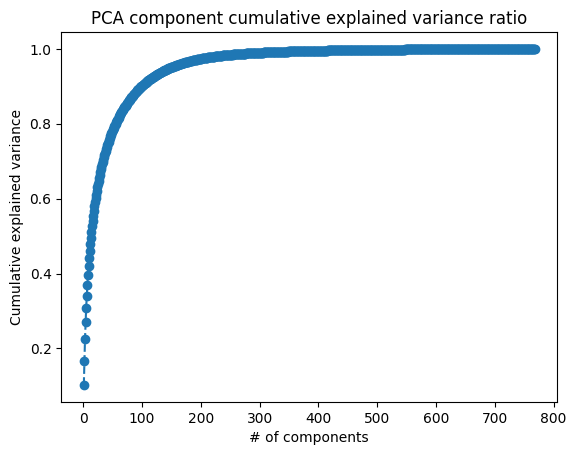

In [3]:
# removing the labels from the embeddings and initializing the pca model
plainEmbeddings = embeddings.drop("Description",axis=1)
pca = PCA()
pca.fit(plainEmbeddings)
x = pca.explained_variance_ratio_

# plotting the explained variance of each number of components
# saves the plot to html_files
plt.plot(range(1,769),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title("PCA component cumulative explained variance ratio")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")
plt.savefig("../html_files/explainedVariance.png")
plt.show()


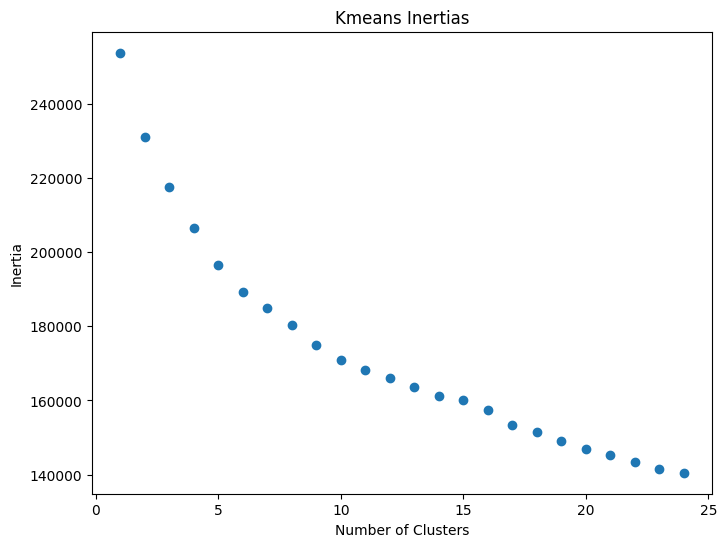

In [4]:
# 80% at 55 components
# uses PCA to collapse down to 55 features
pca=PCA(n_components=55)
pca.fit(plainEmbeddings)
scores_pca = pca.transform(plainEmbeddings)
scores_pca_df = pd.DataFrame(scores_pca)
scores_pca_df["Description"] = range(69027)

# creates a dataframe to hold all of the cluster information for cluster nums between 5 and 25
df = pd.DataFrame()
df["Description"]=embeddings["Description"]
for i in range(5,25):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=randomSeed)
    kmeans = kmeans_pca.fit(scores_pca)
    df["Kmeans "+str(i)] = kmeans.labels_

# does kmeans for clusters 1-25 and shows+saves inertias
x = doKmeans(scores_pca_df,range(1,25),saveInertias=True)

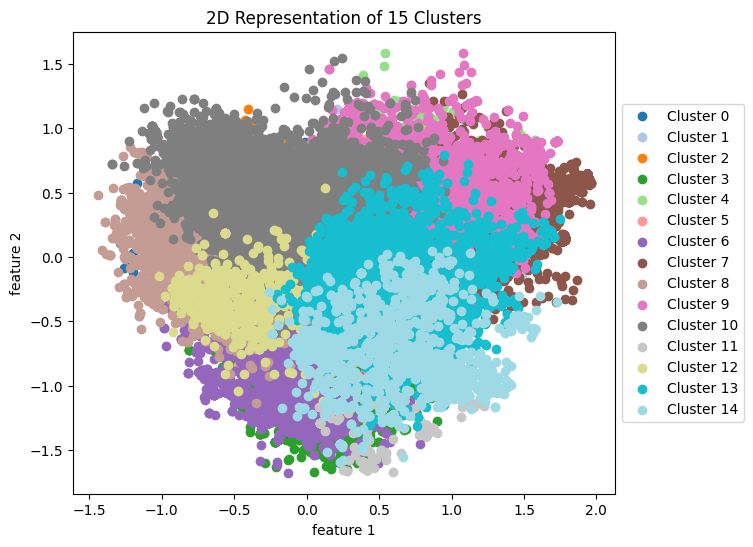

In [5]:
# uses PCA to collapse down to 2D for visualization
pca2d=PCA(n_components=2)
pca2d.fit(plainEmbeddings)
scores_pca2d = pca2d.transform(plainEmbeddings)
newEmbeddings2D=pd.DataFrame(scores_pca2d)

# visualizes the clusters
visualize2D(newEmbeddings2D,df,15)

<h2>Examining Clusters</h2>
To manually look at the clusters of rules created, use the below function and scroll through the output. We can then use this to identify clusters that appear to be mostly random and remove them from our visualization.

In [6]:
# retrieve specific cluster data from a cluster number
printClusterSet(df,15)



Printing 15 cluster set:

Cluster 0
                                  Description  Kmeans 15
37                                  two holes          0
42                                    triples          0
47                                    b and h          0
48                                    m and a          0
55                           voyelles + z - u          0
...                                       ...        ...
68925               gleichschenklige dreiecke          0
68940         3 independent points of contact          0
68941  3 points of contact with intersections          0
69011                               has a dot          0
69018             avec un ou plusieurs points          0

[6482 rows x 2 columns]



Cluster 1
                                             Description  Kmeans 15
12                                  angles < 90 degrees           1
21                              protrusions on the right          1
22                                pr

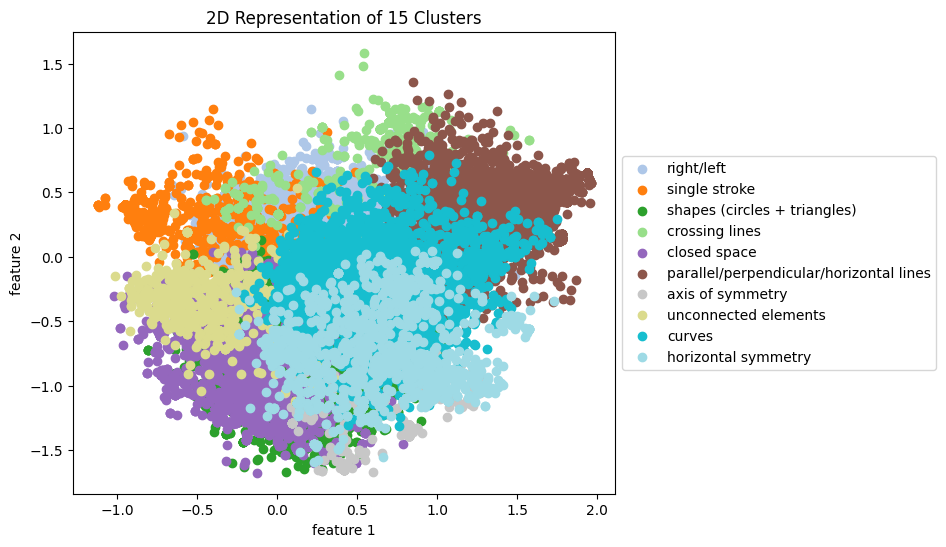

In [7]:
# visualizes the clusters after removing the random clusters
labels = ["random","right/left","single stroke","shapes (circles + triangles)","crossing lines","random","closed space",
          "parallel/perpendicular/horizontal lines","random","'lines","random","axis of symmetry","unconnected elements",
          "curves","horizontal symmetry"]
visualize2D(newEmbeddings2D,df,15,ignore=[0,5,8,9,10],savefig=True,labels=labels)

In [8]:
t1 = pd.read_csv('csv_files/Letters_Adlam-T1.csv',index_col=False)
t5 = pd.read_csv('csv_files/Letters_Adlam-T5.csv',index_col=False)

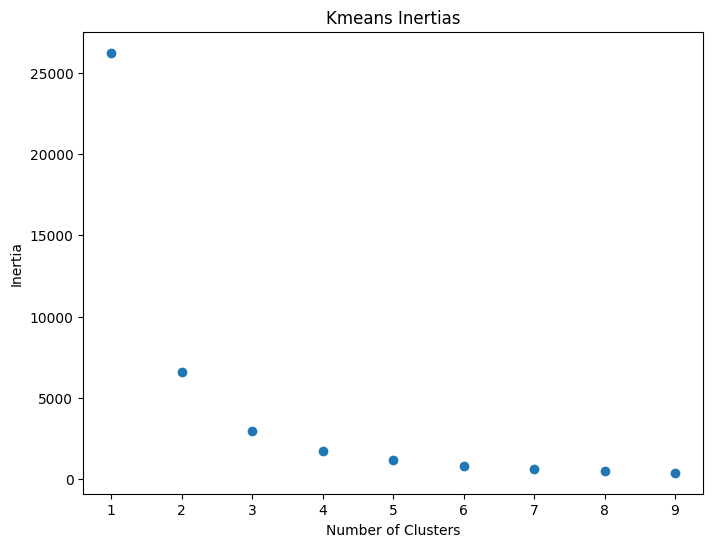

In [9]:
letters = t1["Unicode"].unique()
t5["Description"]=range(68)
t5kmeans = doKmeans(t5.drop(['Unicode'],axis=1),range(1,10))

# 3 clusters


In [10]:
t5kmeans

Description  Kmeans 1  Kmeans 2  Kmeans 3  Kmeans 4  Kmeans 5  Kmeans 6  \
0             0         0         0         0         0         4         4   
1             1         0         0         0         0         4         4   
2             2         0         0         0         0         4         4   
3             3         0         0         0         0         4         4   
4             4         0         0         0         0         4         4   
..          ...       ...       ...       ...       ...       ...       ...   
63           63         0         1         2         2         2         5   
64           64         0         1         2         2         2         5   
65           65         0         1         2         2         2         5   
66           66         0         1         2         2         2         5   
67           67         0         1         2         2         2         5   

    Kmeans 7  Kmeans 8  Kmeans 9  
0          4         4         4  
1          4         4         4  
2          4         4         4  
3          4         4         4  
4          4         4         4  
..       ...       ...       ...  
63         5         7         7  
64         5         7         7  
65         5         7         7  
66         5         7         7  
67         5         7         7  

[68 rows x 10 columns]